## Read advertising.csv

In [147]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [148]:
df_adv=pd.read_csv('/kaggle/input/advertising/advertising - advertising.csv')

In [149]:
df_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [150]:
df_adver=pd.DataFrame(df_adv)
df_adver.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


## Comparing Proportions (CI - Hypothesis Test)
### Check for significance difference between Male and Female in Click on Ad.
### Find the CI for this difference.
### Define and write your null and alternate hypothesis.
### Write your conclusion (Reject/not reject null hypothesis) and explain what does it mean (there is significance difference or not).
### Solve using the calculation steps and confirm using "scipy.stats.ttest_ind()"

In [151]:
value=df_adv['Male'].value_counts()
value

Male
0    519
1    481
Name: count, dtype: int64

In [152]:
df_adv['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

<Axes: xlabel='Clicked on Ad', ylabel='count'>

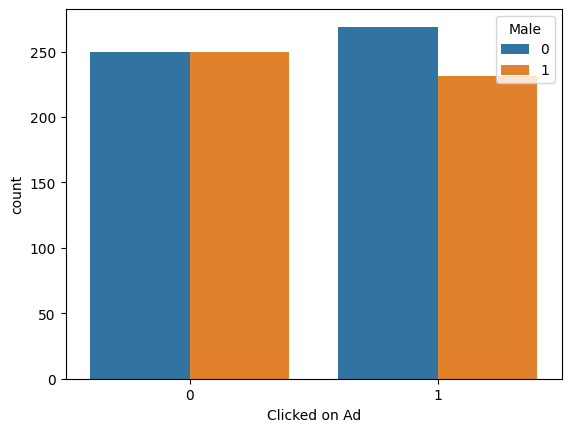

In [153]:
sns.countplot(data=df_adv,x='Clicked on Ad',hue='Male')

<Axes: xlabel='Male', ylabel='Clicked on Ad'>

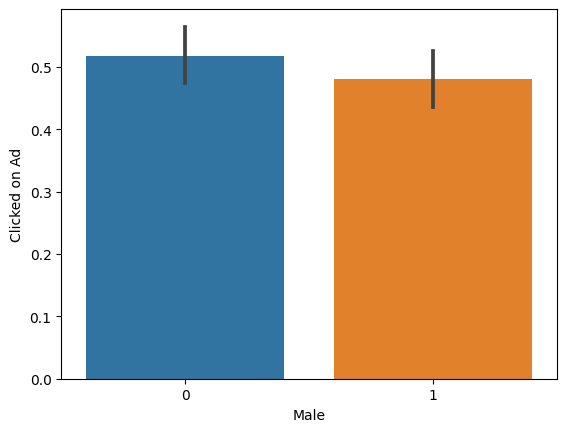

In [154]:
sns.barplot(x=df_adv['Male'],y=df_adv['Clicked on Ad'])

In [156]:
grouped = df_adv.groupby('Male')['Clicked on Ad'].value_counts()
grouped.get(0,1)

Clicked on Ad
1    269
0    250
Name: count, dtype: int64

In [157]:
proportions = df_adv.groupby('Male')['Clicked on Ad'].mean()
difference = proportions[0] - proportions[1]
difference

0.038054951349748956

In [159]:
n_male = len(df_adv[(df_adv['Male'] == 1) & (df_adv['Clicked on Ad'])])
n_female = len(df_adv[(df_adv['Male'] == 0) & (df_adv['Clicked on Ad'])])

In [160]:
p1=proportions[0]
p2=proportions[1]
mean=df_adv.groupby('Male')['Clicked on Ad'].mean()
std=df_adv.groupby('Male')['Clicked on Ad'].std()

SE = np.sqrt((p1 * (1 - p1)) / n_male + (p2 * (1 - p2)) / n_female)
CI_z_h=difference+1.96*SE
CI_z_l=difference-1.96*SE

In [161]:
print(CI_z_h)
print(CI_z_l)

0.12589966188504226
-0.04978975918554436


In [163]:
from scipy.stats import norm

In [164]:
z_score=difference/SE
print(z_score)
(1-norm.cdf(z_score))*2

0.849085894768142


0.3958334985420908

In [166]:
import scipy.stats as st

## Comparing Means (CI - Hypothesis Test)
### Check for significance difference between Male and Female in Click on Ad.
### Find the CI for this difference.
### Define and write your null and alternate hypothesis.
### Write your conclusion (Reject/not reject null hypothesis) and explain what does it mean (there is significance difference or not).
### Solve using the calculation steps and confirm using "scipy.stats.ttest_ind()"

In [169]:
value=df_adv['Male'].value_counts()
value

Male
0    519
1    481
Name: count, dtype: int64

<Axes: xlabel='Male', ylabel='Daily Time Spent on Site'>

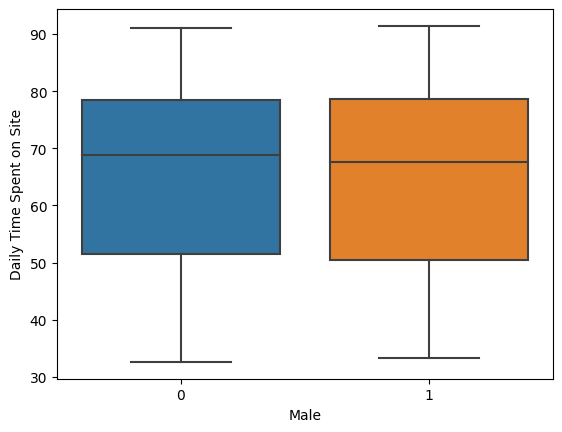

In [170]:
sns.boxplot(x=df_adv['Male'],y=df_adv['Daily Time Spent on Site'])

<Axes: xlabel='Male', ylabel='Daily Time Spent on Site'>

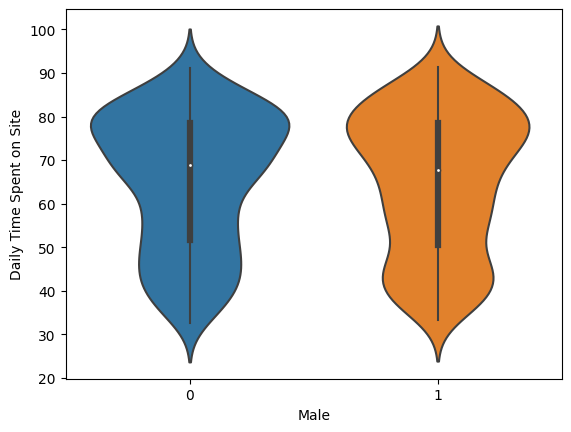

In [171]:
sns.violinplot(x=df_adv['Male'],y=df_adv['Daily Time Spent on Site'])

<Axes: xlabel='Male', ylabel='Daily Time Spent on Site'>

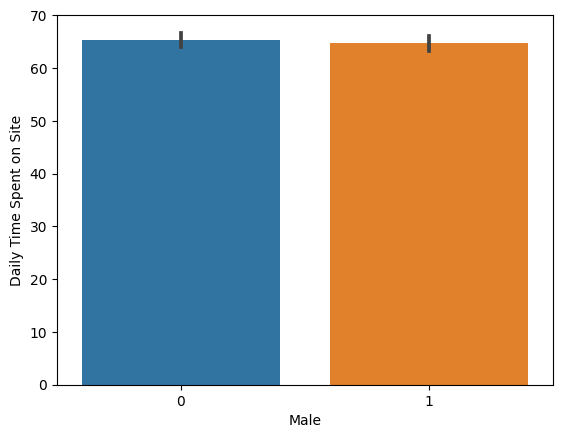

In [172]:
sns.barplot(x=df_adv['Male'],y=df_adv['Daily Time Spent on Site'])

In [174]:
means = df_adv.groupby('Male')['Daily Time Spent on Site'].mean()
male_data = df_adv[df_adv['Male'] == 1]['Daily Time Spent on Site']
female_data = df_adv[df_adv['Male'] == 0]['Daily Time Spent on Site']
mean_m=male_data.mean()
mean_f=female_data.mean()
diff=mean_f - mean_m
diff

0.6010126622843472

In [175]:
p1=mean_m
p2=mean_f
#mean=df_adv.groupby('Male')['Clicked on Ad'].mean()
std=df_adv.groupby('Male')['Daily Time Spent on Site'].std()
SE=np.sqrt(std[0]**2/n_male + std[1]**2/n_male)
CI_z_h=diff+1.96*SE
CI_z_l=diff-1.96*SE

In [176]:
print(CI_z_h)
print(CI_z_l)

3.4949309592527666
-2.292905634684072


In [177]:
z_score=diff/SE
print(z_score)
(1-norm.cdf(z_score))*2

0.4070553129683522


0.683967363331095

In [179]:
st.ttest_ind(male_data,female_data)

TtestResult(statistic=-0.5987865950462051, pvalue=0.5494510852945214, df=998.0)

## Paired t-test
### Check for significant difference in Daily Time Spent on Site in April and May.
### Solve using the calculation steps and confirm using "scipy.stats.ttest_rel()"
### Write your conclusion.
##### Hint: In this exercise we suppose we compare the Daily Time Spent on Site in April and May for the same people. That is why we selected April and May because it has the same value counts.

In [181]:
df_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [182]:
df_adv['Timestamp']=pd.to_datetime(df_adv['Timestamp'])
time = df_adv['Timestamp'].iloc[0]
time

Timestamp('2016-03-27 00:53:11')

In [183]:
time.month

3

In [184]:
df_adv['Month']=df_adv['Timestamp'].apply(lambda x: x.month)

In [185]:
df_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
 10  Month                     1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 86.1+ KB


In [186]:
df_adv['Month'].value_counts()

Month
2    160
3    156
4    147
1    147
5    147
6    142
7    101
Name: count, dtype: int64

In [187]:
april_data = df_adv[df_adv['Month'] == 4]['Daily Time Spent on Site']
may_data = df_adv[df_adv['Month'] == 5]['Daily Time Spent on Site']
mean_ap=april_data.mean()
mean_ma=may_data.mean()
diff= mean_ma-mean_ap
diff

-1.6135374149660038

In [188]:
may_std = may_data.std()
apr_std = april_data.std()
n_may = len(may_data)
n_apr = len(april_data)
SE= np.sqrt((may_std**2 / n_may) + (apr_std**2 / n_apr))
SE

1.8682401540388407

In [189]:
t_value=diff/SE
t_value

-0.8636670245406032

In [190]:
num_pairs = min(n_may, n_apr)
df = num_pairs - 1

In [191]:
from scipy.stats import t

In [192]:
p_value=t.cdf(t_value,df)*2
p_value

0.38918746101377255

In [195]:
st.ttest_rel(april_data, may_data)

TtestResult(statistic=0.9059345312438, pvalue=0.36646315120526884, df=146)

## Chi-Squared Distribution    (Optional Exercise)
### Draw 10 different random sample of size = 1000 from standard normal distribution.
### Derive a Chi-square distribution of k=1,2,....10 using these samples.
### Plot your results.
### Compare with the one from scipy.stats.chi2()
### You can also compare with the one from np.random.chisquare()

## Chi-square goodness of fit
### Create a new column that contain the month.
### Check if all existing months are equally distributed.
### Confirm using from scipy.stats.chisquare()

In [196]:
df_adv['Month'].value_counts()

Month
2    160
3    156
4    147
1    147
5    147
6    142
7    101
Name: count, dtype: int64

In [197]:
df_adv.shape

(1000, 11)

<Axes: xlabel='Month', ylabel='count'>

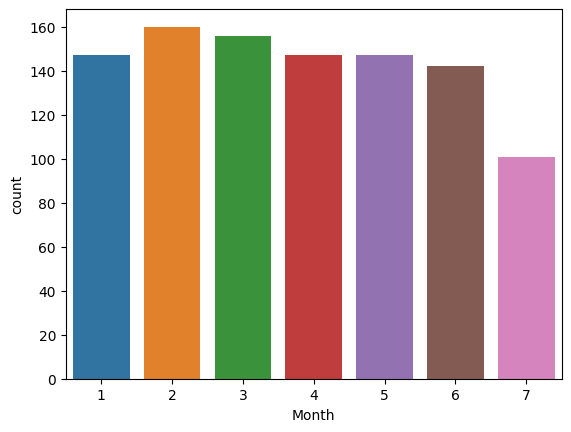

In [198]:
sns.countplot(data=df_adv,x='Month')

In [199]:
from scipy.stats import chi2

In [200]:
observed=df_adv['Month'].value_counts().sort_index()
expected=1000/7
chi2=np.sum((observed-expected)**2/expected) 
chi2

15.896

In [201]:
observed.values

array([147, 160, 156, 147, 147, 142, 101])

In [202]:
df=len(observed)-1
p_value=1-st.chi2.cdf(chi2,df)
p_value

0.01432319742349919

In [204]:
st.chisquare([147, 160, 156, 147, 147, 142, 101],f_exp=expected)

Power_divergenceResult(statistic=15.896, pvalue=0.01432319742349924)

## Chi-square test of independence
### Check if there is a significant relation between "Clicked on Ad" and "month".
### Use from scipy.stats.chi2_contingency() only.
### Write your conclusion

<Axes: xlabel='Clicked on Ad', ylabel='count'>

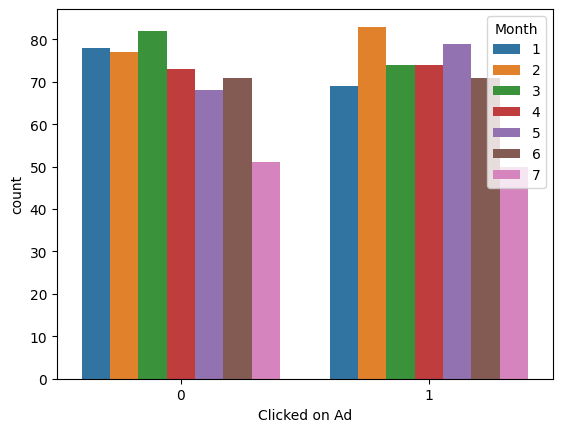

In [206]:
sns.countplot(data=df_adv,x='Clicked on Ad',hue='Month')

<Axes: xlabel='Month', ylabel='Clicked on Ad'>

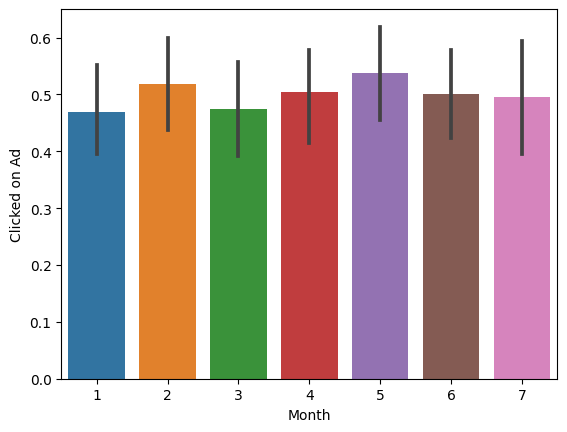

In [207]:
sns.barplot(x=df_adv['Month'],y=df_adv['Clicked on Ad'])

<Axes: xlabel='Clicked on Ad', ylabel='Month'>

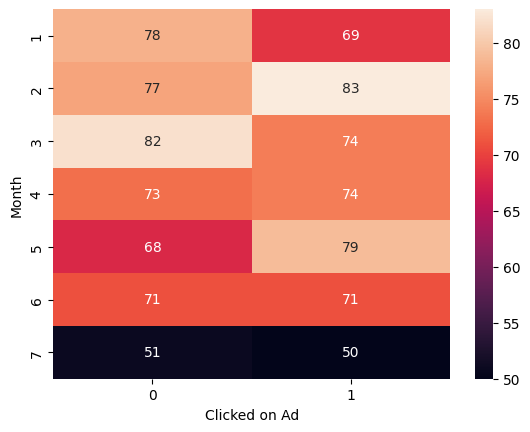

In [208]:
crosstab=pd.crosstab(df_adv['Month'],df_adv['Clicked on Ad'])
sns.heatmap(crosstab,annot=True)

In [209]:
st.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=2.026109781307801, pvalue=0.9172816839796131, dof=6, expected_freq=array([[73.5, 73.5],
       [80. , 80. ],
       [78. , 78. ],
       [73.5, 73.5],
       [73.5, 73.5],
       [71. , 71. ],
       [50.5, 50.5]]))

## F Distribution (Optional)
### Generate different F distributions from different Chai distributions using np.random.chisquare().
### Compare with scipy.stats.f()

## ANOVA
### Create a new column that identifies age groups (young,adult,old). You can use pd.cut()
### Check if the age group affects the Daily Time Spent on Site.
### Use only scipy.stats.f_oneway()
### Write your conclusion.

In [210]:
age_bin=[0,25,50,100]
age_labels=['young','adult','old']
df_adv['Age Group']=pd.cut(df_adv['Age'],bins=age_bin,labels=age_labels)

<Axes: xlabel='Daily Time Spent on Site', ylabel='Count'>

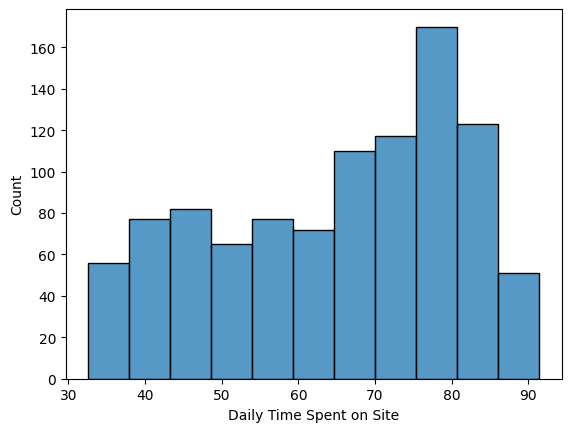

In [211]:
sns.histplot(data=df_adv,x=df_adv['Daily Time Spent on Site'])

<Axes: xlabel='Age', ylabel='Count'>

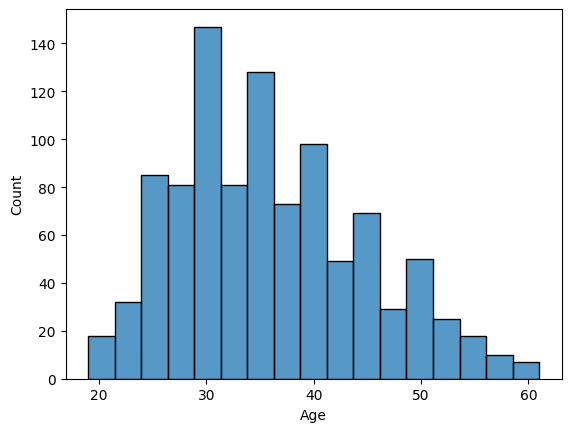

In [212]:
sns.histplot(data=df_adv,x=df_adv['Age'])

<Axes: xlabel='Age', ylabel='count'>

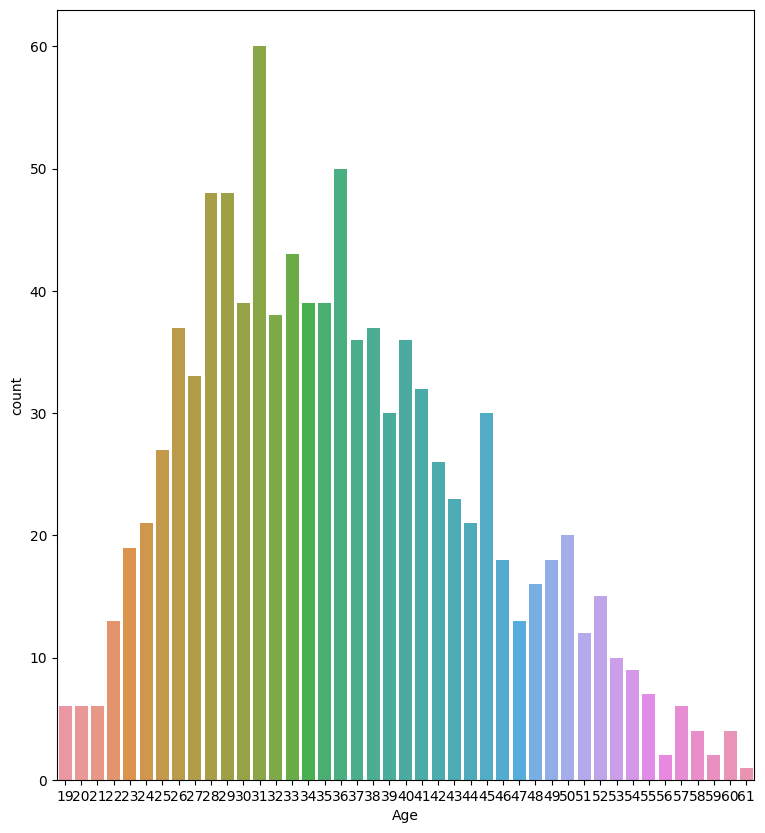

In [213]:
plt.figure(figsize=(9,10))
sns.countplot(data=df_adv,x=df_adv['Age'])

In [214]:
df_adv['Age'].value_counts()

Age
31    60
36    50
28    48
29    48
33    43
35    39
30    39
34    39
32    38
26    37
38    37
37    36
40    36
27    33
41    32
45    30
39    30
25    27
42    26
43    23
44    21
24    21
50    20
23    19
46    18
49    18
48    16
52    15
47    13
22    13
51    12
53    10
54     9
55     7
20     6
21     6
57     6
19     6
60     4
58     4
56     2
59     2
61     1
Name: count, dtype: int64

In [215]:
df_adv['Age Group'].value_counts()

Age Group
adult    830
young     98
old       72
Name: count, dtype: int64

In [216]:
df_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
 10  Month                     1000 non-null   int64         
 11  Age Group                 1000 non-null   category      
dtypes: category(1), datet

<Axes: xlabel='Age Group', ylabel='Age'>

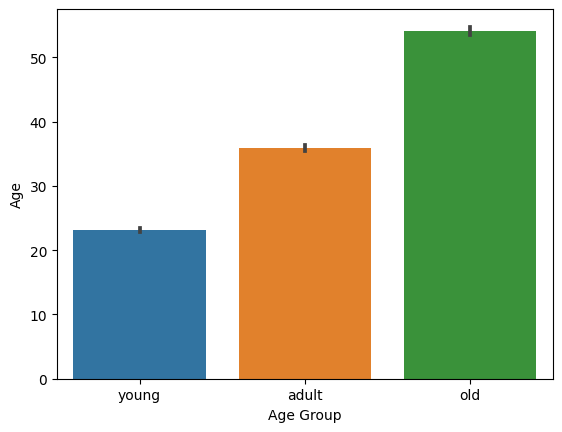

In [217]:
sns.barplot(x=df_adv['Age Group'],y=df_adv['Age'])

<Axes: xlabel='Age Group', ylabel='count'>

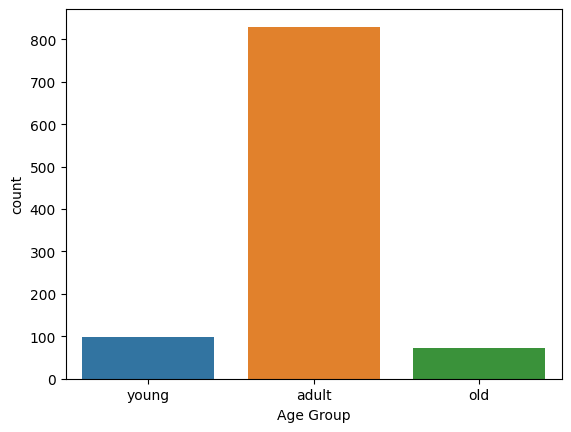

In [218]:
sns.countplot(data=df_adv,x=df_adv['Age Group'])

<Axes: xlabel='Age Group', ylabel='Daily Time Spent on Site'>

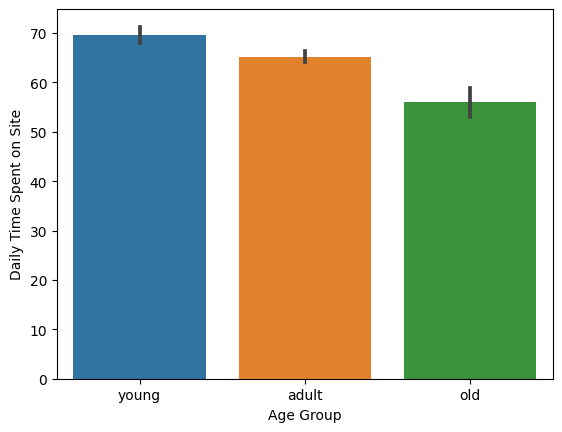

In [219]:
sns.barplot(x=df_adv['Age Group'],y=df_adv['Daily Time Spent on Site'])

<Axes: xlabel='Age Group', ylabel='Daily Time Spent on Site'>

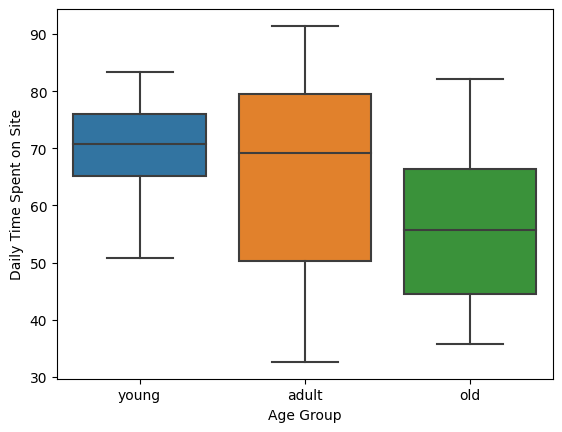

In [220]:
sns.boxplot(x=df_adv['Age Group'],y=df_adv['Daily Time Spent on Site'])

<Axes: xlabel='Age Group', ylabel='Daily Time Spent on Site'>

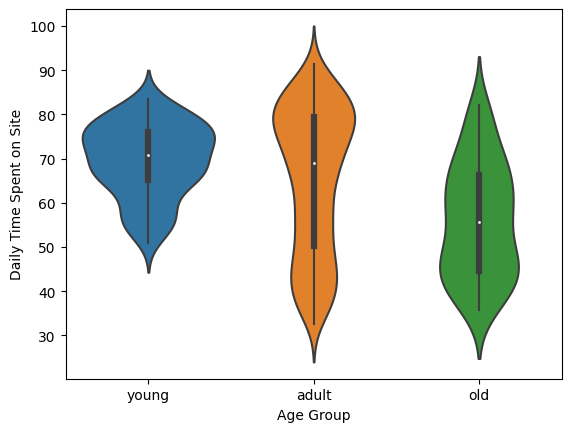

In [221]:
sns.violinplot(x=df_adv['Age Group'],y=df_adv['Daily Time Spent on Site'])

<Axes: xlabel='Age Group', ylabel='Daily Time Spent on Site'>

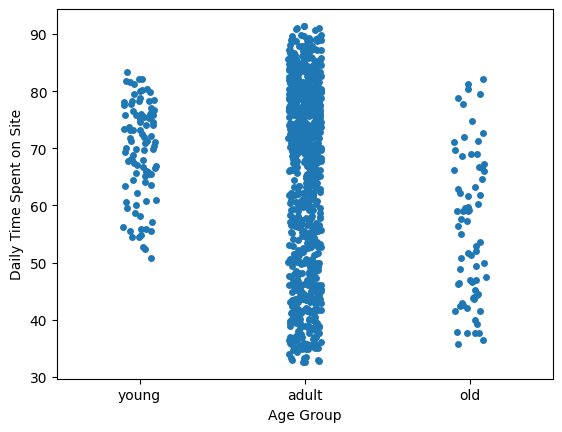

In [222]:
sns.stripplot(x=df_adv['Age Group'],y=df_adv['Daily Time Spent on Site'])

In [223]:
young_data = df_adv[df_adv['Age Group'] == 'young']['Daily Time Spent on Site']
adult_data = df_adv[df_adv['Age Group'] == 'adult']['Daily Time Spent on Site']
old_data = df_adv[df_adv['Age Group'] == 'old']['Daily Time Spent on Site']
st.f_oneway(young_data,adult_data,old_data)

F_onewayResult(statistic=16.370611885101873, pvalue=1.0105991703537539e-07)